In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Python jupyter\database\cs-training.csv')

In [17]:
import pandas_profiling
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file=r'/Users/matlida/Documents/profile.html')

In [3]:
from sklearn.ensemble import RandomForestRegressor  
# 预测填充函数
def rf_filling(df):
    # 处理数集
    process_miss = df.iloc[:,[5,0,1,2,3,4,6,7,8,9]]
    #分成已知特征与未知特征
    known = process_miss[process_miss.MonthlyIncome.notnull()]
    unknown = process_miss[process_miss.MonthlyIncome.isnull()]
    #X，要训练的特征
    X = known.iloc[:,1:]
    #y ,结果标签
    y = known.iloc[:,0]
    #训练模型
    rf = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=3,n_jobs=-1)
    rf.fit(X,y)
    #预测缺失值
    pred = rf.predict( unknown.iloc[:,1:]).round(0)
    #补缺缺失值
    df.loc[df['MonthlyIncome'].isnull(),'MonthlyIncome'] = pred
    return df

In [4]:
data = rf_filling(df)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
data = data[data["age"] != 0]
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
data.index = range(data.shape[0])

In [7]:
data["NumberOfDependents"].fillna(data["NumberOfDependents"].mean(),inplace=True)
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [11]:
# 利用上采样进行平衡样本
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y)

NameError: name 'X' is not defined

In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
print(df.shape)

(150000, 11)


In [5]:
print(df.dtypes)

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [18]:
print(df.describe())

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

In [11]:
print(df.groupby(['SeriousDlqin2yrs']).size())

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64


In [12]:
import matplotlib.pyplot as plt
import matplotlib

In [31]:
matplotlib.rcParams['font.sans-serif']=['simHei']

In [13]:
plt.rcParams["font.family"] = 'Arial Unicode MS'

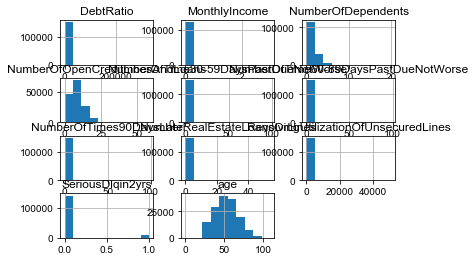

In [14]:
df.hist()
plt.show()

In [ ]:
scatter_matrix(dataset)
plt.show()